In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# x' = f(t,x)
def f(t,x):
    return x - t**2 + 1

def g(t):
    return -0.5*np.exp(t) + t**2 + 2*t + 1

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_runge_kutta(N, y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    
    for i in range(1, len(w)):
        K1 = h*f(t[i-1], w[i-1])
        K2 = h*f(t[i-1] + 0.5*h, w[i-1] + 0.5*K1)
        K3 = h*f(t[i-1] + 0.5*h, w[i-1] + 0.5*K2)
        K4 = h*f(t[i], w[i-1] + K3)
        
        w[i] = w[i-1] + (K1 + 2*K2 + 2*K3 + K4)*(1/6)
        
    return w, t

def metodo_de_euler_modificado(N,y, tmin, tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + 0.5*h*(f(t[i-1],w[i-1]) + f(t[i], w[i-1] + h*f(t[i-1], w[i-1])))
        
    return w,t

def metodo_de_heun(N,y,tmin,tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + (1/4)*h*(f(t[i-1],w[i-1]) + 3*(f(t[i-1] + (2/3)*h, w[i-1] + (2/3)*h*f(t[i-1] + (1/3)*h, w[i-1] + (1/3)*h*f(t[i-1],w[i-1])))))
        
    return w,t

def metodo_do_ponto_medio(N,y,tmin,tmax):
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + h*f(t[i-1] + 0.5*h, w[i-1] + 0.5*h*f(t[i-1],w[i-1]))
    
    return w,t


[0.         0.00050916 0.00125642 0.00233649 0.00386672]


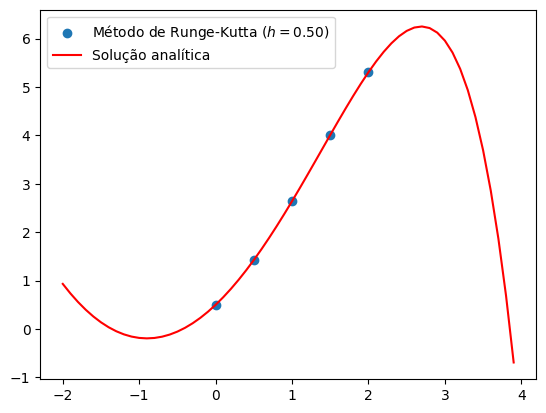

In [20]:
w, t = metodo_de_runge_kutta(4, 0.5, 0, 2)

h = t[1] - t[0]

x = np.arange(-2,4,0.1)
y = g(x)

print(abs(g(t) - w))

plt.scatter(t,w, label=f'Método de Runge-Kutta ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('metodo_de_runge_kutta.pdf')
plt.show()

[0.         0.05063936 0.12523409 0.23376484 0.38921218]


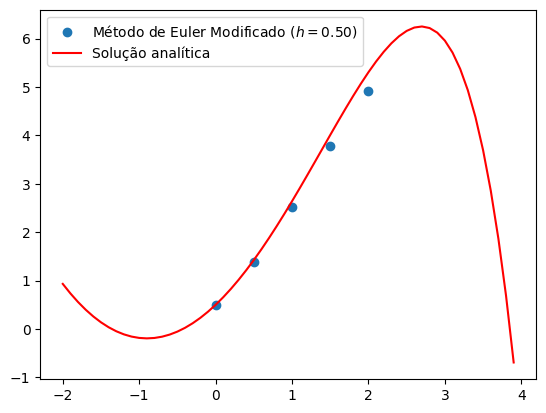

In [4]:
w, t = metodo_de_euler_modificado(4, 0.5, 0, 2)

h = t[1] - t[0]

x = np.arange(-2,4,0.1)
y = g(x)

print(abs(g(t) - w))

plt.scatter(t,w, label=f'Método de Euler Modificado ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('metodo_de_euler_modificado.pdf')
plt.show()

[0.         0.00202825 0.00442969 0.00683764 0.00825441]


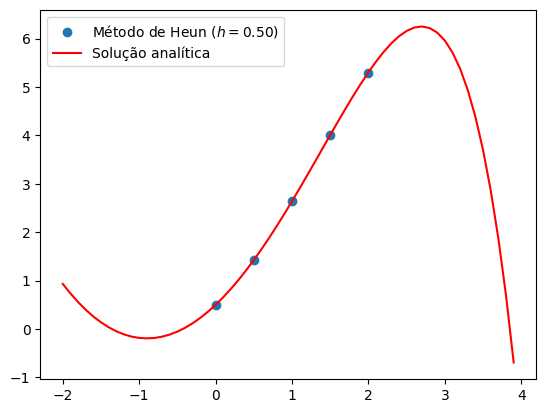

In [5]:
w, t = metodo_de_heun(4, 0.5, 0, 2)

h = t[1] - t[0]

x = np.arange(-2,4,0.1)
y = g(x)

print(abs(g(t) - w))

plt.scatter(t,w, label=f'Método de Heun ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('metodo_de_heun.pdf')
plt.show()

# LISTA

[2.         2.775      3.60083333 4.46882937 5.37285856]
[2.         2.77892944 3.60819766 4.47932763 5.38629436]


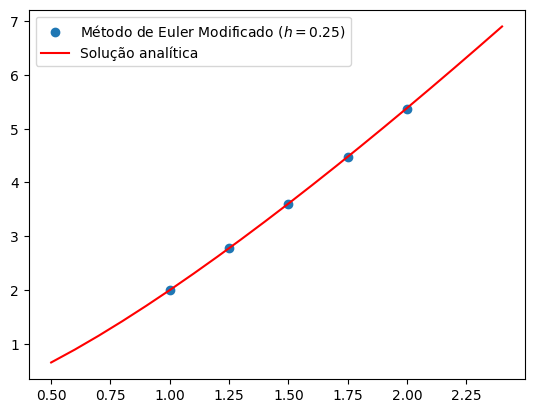

In [7]:
def f(t,x):
    return 1 + x/t

def g(t):
    return t*np.log(t) + 2*t

w, t = metodo_de_euler_modificado(4, 2, 1, 2)

h = t[1] - t[0]

x = np.arange(0.5,2.5,0.1)
y = g(x)

print(w)
print(g(t))
# print(abs(g(t) - w))

plt.scatter(t,w, label=f'Método de Euler Modificado ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
# plt.savefig('metodo_de_euler_modificado.pdf')
plt.show()

In [2]:
# x' = f(t,x)
def f(t,x):
    return x - t**2 + 1

def g(t):
    return -0.5*np.exp(t) + t**2 + 2*t + 1

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_runge_kutta(gx, N, y, tmin, tmax):
    def f(t,x):
        f = eval(gx)
        return f
    
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    
    for i in range(1, len(w)):
        K1 = h*f(t[i-1], w[i-1])
        K2 = h*f(t[i-1] + 0.5*h, w[i-1] + 0.5*K1)
        K3 = h*f(t[i-1] + 0.5*h, w[i-1] + 0.5*K2)
        K4 = h*f(t[i], w[i-1] + K3)
        
        w[i] = w[i-1] + (K1 + 2*K2 + 2*K3 + K4)*(1/6)
        
    return w, t

def metodo_de_euler_modificado(gx, N,y, tmin, tmax):
    def f(t,x):
        f = eval(gx)
        return f
    
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + 0.5*h*(f(t[i-1],w[i-1]) + f(t[i], w[i-1] + h*f(t[i-1], w[i-1])))
        
    return w,t

def metodo_de_heun(gx, N,y,tmin,tmax):
    def f(t, x):
        f = eval(gx)
        return f
    
    h = (tmax - tmin)/N
    t = part(N, tmin, tmax)
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + (1/4)*h*(f(t[i-1],w[i-1]) + 3*(f(t[i-1] + (2/3)*h, w[i-1] + (2/3)*h*f(t[i-1] + (1/3)*h, w[i-1] + (1/3)*h*f(t[i-1],w[i-1])))))
        
    return w,t


def g(t):
    return t + 1/(1-t)

w, t = metodo_de_runge_kutta("1 + (t-x)**2", 2, 1, 2, 3)

h = t[1] - t[0]

x = np.arange(1.5,3.5,0.1)
y = g(x)

print(w)
print(g(t))
# print(abs(g(t) - w))

plt.scatter(t,w, label=f'Solução numérica ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.show()


NameError: name 'np' is not defined

0.0 & 8.0 & 300.0 & 5.122393434629427\\
20.0 & 7.814254660215951 & 320.0 & 4.922019937327068\\
40.0 & 7.627768958109702 & 340.0 & 4.720274389276125\\
60.0 & 7.440518642463804 & 360.0 & 4.517077940048921\\
80.0 & 7.252477928624467 & 380.0 & 4.312342789976064\\
100.0 & 7.063619351952775 & 400.0 & 4.105970616433378\\
120.0 & 6.873913602232604 & 420.0 & 3.897850613519808\\
140.0 & 6.683329335863424 & 440.0 & 3.6878570197164793\\
160.0 & 6.491832962013862 & 460.0 & 3.4758459562189508\\
180.0 & 6.299388398098322 & 480.0 & 3.2616513199382022\\
200.0 & 6.105956788916688 & 500.0 & 3.0450793526508866\\
220.0 & 5.911496182503182 & 520.0 & 2.8259013112472924\\
240.0 & 5.715961154079041 & 540.0 & 2.6038433377157992\\
260.0 & 5.519302367377883 & 560.0 & 2.378572063597974\\
280.0 & 5.32146605985037 & 580.0 & 2.149673462109837\\
300.0 & 5.122393434629427 & 600.0 & 1.9166205030952712\\
802.6959001660395


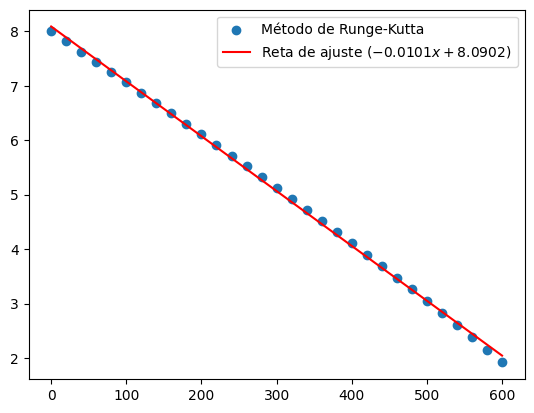

In [18]:
def minimos_quadrados_polinomial(D, g):
    X = D[:,0]
    Y = D[:,1]
    
    h = g+1
    
    A = np.zeros((h,h))
    b = np.zeros(h)
    
    for i in range(h):
        for j in range(h):
            A[i,j] = np.sum((X)**(i+j))
            
    for i in range(h):
        b[i] = np.sum(((X)**i)*Y)
        
    d = np.linalg.solve(A,b)
    c = np.zeros(len(d))
    
    for i in range(len(d)):
        c[i] = d[len(d)-i-1]
    
    return c

def A(x):
    V = 512*np.pi
    
    return x*((V/(0.333*x*np.pi))**0.333)

def f(t,x):
    r = 0.1
    g = 32.1
    
    return -0.6*(np.pi)*(r**2)*((2*g)**0.5)*((x**0.5)/A(x))
    

# x(0) = 8
w, t = metodo_de_runge_kutta(30, 8, 0, 600)

h = t[1] - t[0]

A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w

for i in range(16):
    print(f"{t[i]} & {w[i]} & {t[i+15]} & {w[i+15]}\\\\")

c = minimos_quadrados_polinomial(A,1)
x = np.linspace(np.min(A[:,0]), np.max(A[:,0]), 10)
y = np.polyval(c, x)

print(f"{-c[1]/c[0]}")

plt.scatter(t,w, label='Método de Runge-Kutta')
plt.plot(x,y, c='r', label=f'Reta de ajuste (${c[0]:.4f}x + {c[1]:.4f}$)')
plt.legend()
plt.savefig('q28.pdf')
plt.show()

1.0000
1.0043
1.0150
1.0298
1.0475
1.0673
1.0884
1.1107
1.1337
1.1572
1.1812


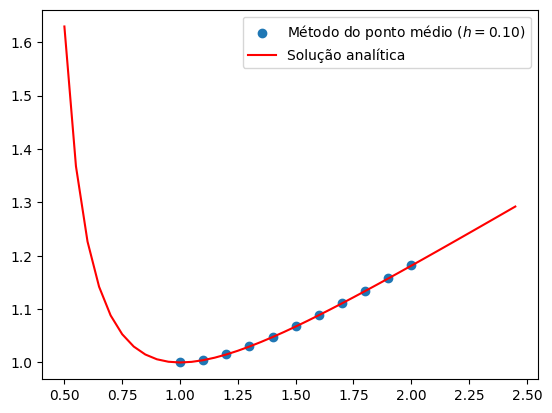

In [23]:
def f(t,x):
    return x/t - (x/t)**2

def g(t):
    return t/(1 + np.log(t))

# w, t = metodo_de_euler_modificado(10, 1, 1, 2)
w, t = metodo_do_ponto_medio(10, 1, 1, 2)

h = t[1] - t[0]

x = np.arange(0.5,2.5,0.05)
y = g(x)

for i in range(len(t)):
    e = abs(g(t) - w)
    print(f"{g(t)[i]:.4f}")

# plt.scatter(t,w, label=f'Método de Euler Modificado ($h = {h:.2f}$)')
plt.scatter(t,w, label=f'Método do ponto médio ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
# plt.savefig('q3a.pdf')
plt.savefig('q7a.pdf')
plt.show()

0.0000
0.2212
0.4897
0.8128
1.1994
1.6613
2.2135
2.8766
3.6785
4.6587
5.8741


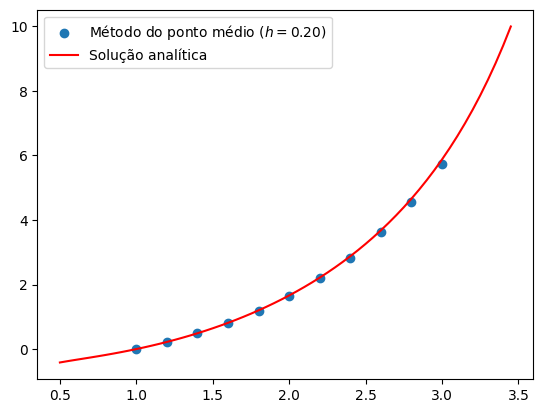

In [26]:
def f(t,x):
    return 1 + x/t + (x/t)**2

def g(t):
    return t*np.tan(np.log(t))

# w, t = metodo_de_euler_modificado(10, 0, 1, 3)
w, t = metodo_do_ponto_medio(10, 0, 1, 3)

h = t[1] - t[0]

x = np.arange(0.5,3.5,0.05)
y = g(x)

for i in range(len(t)):
    e = abs(g(t) - w)
    print(f"{g(t)[i]:.4f}")

# plt.scatter(t,w, label=f'Método de Euler Modificado ($h = {h:.2f}$)')
plt.scatter(t,w, label=f'Método do ponto médio ($h = {h:.2f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
# plt.savefig('q3b.pdf')
plt.savefig('q7b.pdf')
plt.show()